In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [293]:
sunspot_data = pd.read_csv('/home/souvik/Repos/Datasets/monthly-sunspots.csv', index_col=0, parse_dates=True)

In [294]:
sunspot_data.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


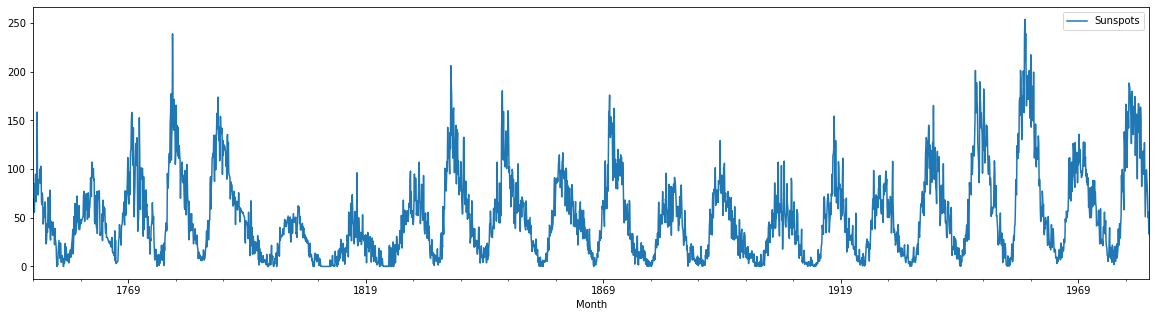

In [295]:
sunspot_data.plot(figsize = (20, 5))

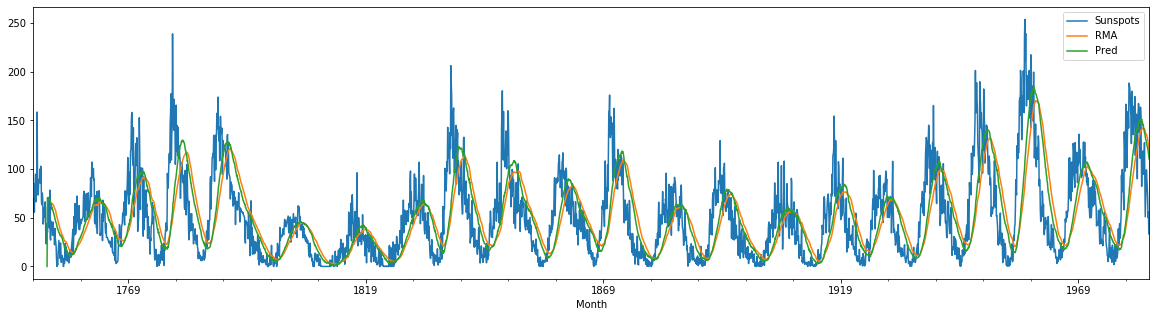

In [366]:
sunspot_data['RMA'] = sunspot_data.rolling(48).mean()
sunspot_data.plot(figsize=(20, 5))

In [367]:
# Data definitely looks seasonal

decompose = seasonal_decompose(sunspot_data['RMA'].dropna())

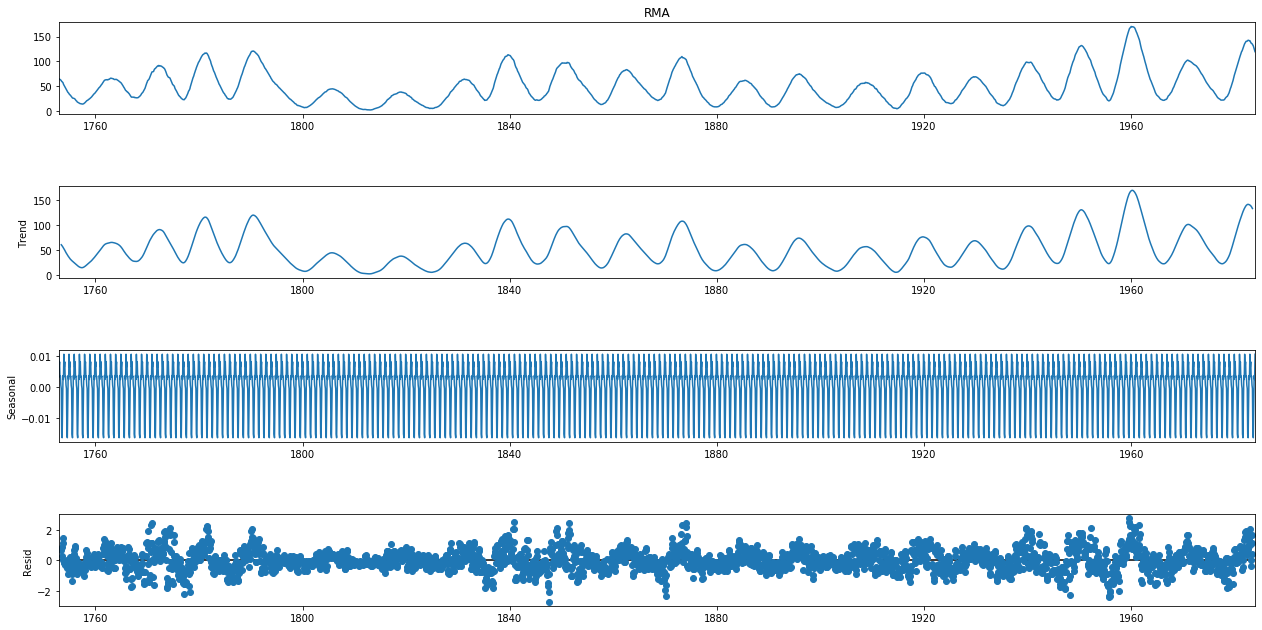

In [368]:
fig = decompose.plot()
fig.set_size_inches(20, 10)

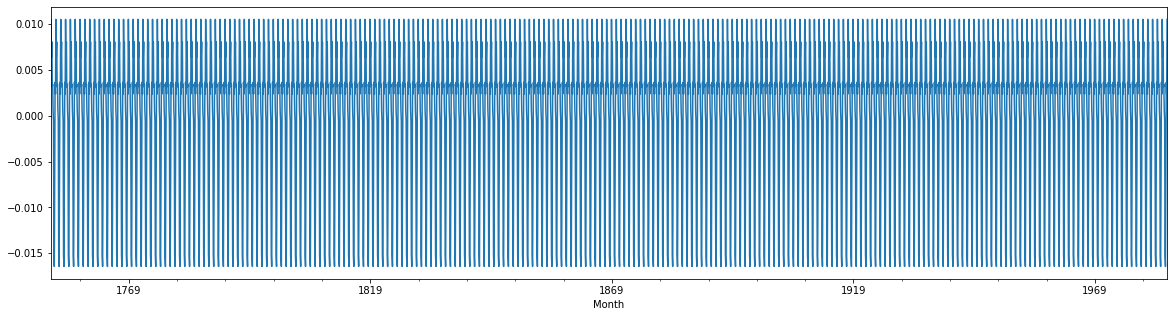

In [369]:
#isolating seasonal graph

fig = decompose.seasonal.plot(figsize=(20,5))

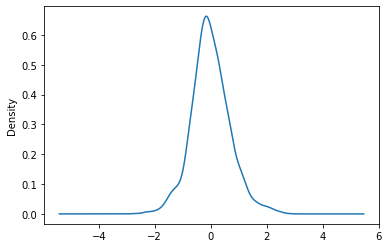

In [370]:
fig = decompose.resid.plot(kind='kde')

In [371]:
#Almost a yearly cycle. Let's check stationarity

def check_stationarity(dataset):
    adf_output = adfuller(dataset)
    print(adf_output)

In [372]:
check_stationarity(sunspot_data['RMA'].dropna())

(-4.797682595226613, 5.494381397473148e-05, 28, 2744, {'1%': -3.4327353600205757, '5%': -2.862593880583324, '10%': -2.5673310144635737}, 3293.9448142423216)


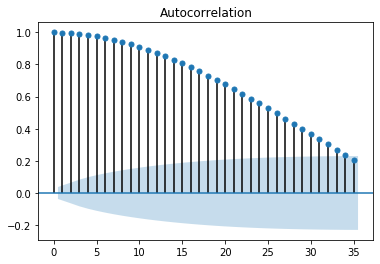

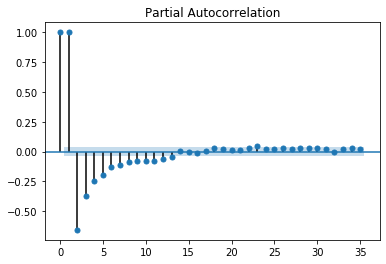

In [373]:
# ADFuller is stationary

#to understand period, lets plot acf

acf = plot_acf(sunspot_data['RMA'].dropna())
pacf = plot_pacf(sunspot_data['RMA'].dropna())

In [414]:
#Good start is 1, 0, 1

model=sm.tsa.statespace.SARIMAX(sunspot_data['RMA'][:1800].dropna(), order=(2, 0, 2))

/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [415]:
model_fit = model.fit()

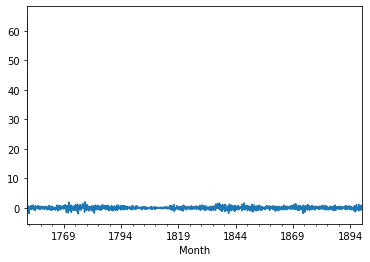

In [416]:
model_fit.resid.plot()

In [417]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    RMA   No. Observations:                 1753
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1107.363
Date:                Sat, 09 May 2020   AIC                           2224.727
Time:                        17:18:37   BIC                           2252.072
Sample:                    12-01-1752   HQIC                          2234.835
                         - 12-01-1898                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9824      0.004    467.048      0.000       1.974       1.991
ar.L2         -0.9829      0.004   -231.483      0.000      -0.991      -0.975
ma.L1         -0.4246      0.021    -19.948      0.000      -0.466      -0.383
ma.L2         -0.0841      0.021     -3.982      0.000      -0.125      -0.043
sigma2         0.2057      0.005     39.106      0.000       0.195       0.216
===================================================================================
Ljung-Box (Q):                      151.60   Jarque-Bera (JB):               189.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [418]:
pred = model_fit.predict(start=300, end=len(sunspot_data)+300)

In [419]:
pred.tail(100)

2004-09-01    0.000066
2004-10-01    0.000048
2004-11-01    0.000030
2004-12-01    0.000013
2005-01-01   -0.000004
                ...   
2012-08-01   -0.000361
2012-09-01   -0.000355
2012-10-01   -0.000350
2012-11-01   -0.000344
2012-12-01   -0.000339
Freq: MS, Length: 100, dtype: float64

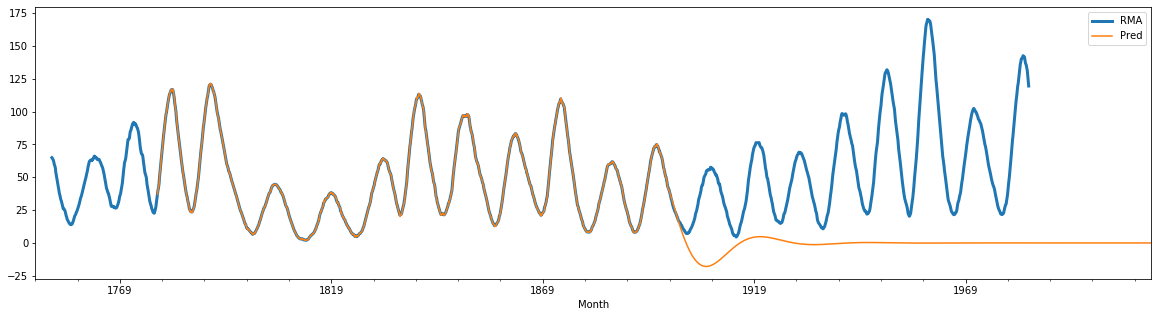

In [420]:
sunspot_data['RMA'].plot(figsize=(20, 5), linewidth=3, label='RMA')
pred.plot(label='Pred')
plt.legend()

In [421]:
#mean_squared_error(sunspot_data['RMA'].dropna(), sunspot_data['Pred'].dropna())

In [422]:
sunspot_data.head()

,Sunspots,RMA,Pred
Month,,,
1749-01-01,58.0,NaN,NaN
1749-02-01,62.6,NaN,NaN
1749-03-01,70.0,NaN,NaN
1749-04-01,55.7,NaN,NaN
1749-05-01,85.0,NaN,NaN


In [423]:
pred

1777-12-01    36.967949
1778-01-01    39.530972
1778-02-01    42.527432
1778-03-01    42.539030
1778-04-01    44.361252
                ...    
2012-08-01    -0.000361
2012-09-01    -0.000355
2012-10-01    -0.000350
2012-11-01    -0.000344
2012-12-01    -0.000339
Freq: MS, Length: 2821, dtype: float64